**Maximum Likelihood Estimation for Normal Distribution**


- Probability Density function is given by:
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}\left(
    \frac{x-\mu}{\sigma} \right)^2}
$$
- Optimal Mean (Mu*) is given by:
$$
\mu^* = \frac{1}{N}\sum^N_{i = 1} x_i
$$
- Optimal Standard Deviation (Sigma*) is given by:
$$\sigma^* = \sqrt{
\frac{1}{N}\sum^N_{i=1} (x_i - \mu^*)^2}
$$


In [1]:
# Import Titantic Dataset
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') 

In [2]:
# Age feature in Titantic Dataset
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

In [3]:
# Descriptive Statistics of Age feature
df['age'].describe()

count    627.000000
mean      29.631308
std       12.511818
min        0.750000
25%       23.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

<AxesSubplot:>

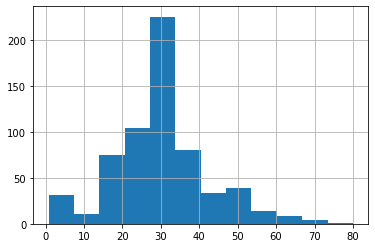

In [4]:
# Histogram Visualization of Age feature
df.age.hist(bins=12)

#### We observe from Histogram Visualization that, Age feature follows a Normal Distribution, Thus, Parametric Estimation with Maximum Likelihood Estimation can be applied.


In [5]:
# Import required packages
from math import pow, sqrt
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Mean (Mu) =  29.618819776714513
Standard Deviation (Sigma) =  12.505941039621886


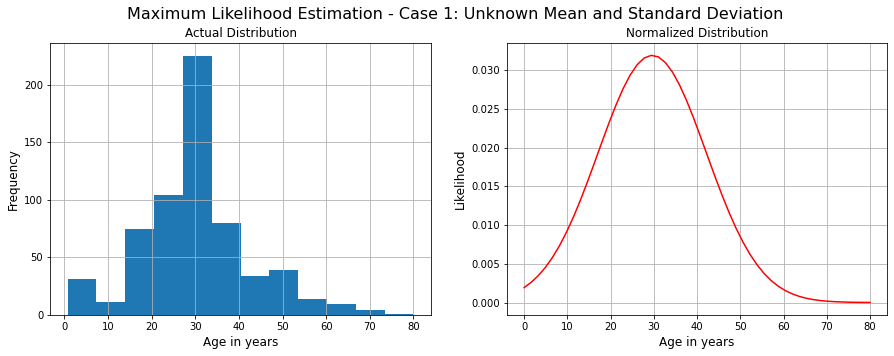

In [6]:
# Case 1: Maximum Likelihood Estimation with Unknown Mean and Unknown Standard Deviation
mu = None
sigma = None

# Calculate Unknown Mu
def calc_mu(df):
    sum = 0
    for x in df:
        sum += int(x)
    return (1/len(df) * sum)

# Calculate Unknown Sigma
def calc_sigma(df):
    mu = calc_mu(df)
    sum = 0
    for x in df:
        sum += pow(int(x) - mu, 2)
    return sqrt(1/len(df) * sum)

x = np.linspace(0, 80)
y = norm.pdf(x, loc = calc_mu(df['age']), scale = calc_sigma(df['age']))

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Maximum Likelihood Estimation - Case 1: Unknown Mean and Standard Deviation', fontsize=16)

ax = plt.subplot(1, 2, 1)
plt.title('Actual Distribution')
plt.hist(df['age'], bins=12)
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.grid(True)

ax = plt.subplot(1, 2, 2)
plt.title('Normalized Distribution')
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Likelihood', fontsize=12)
plt.plot(x, y, 'r')
plt.grid(True)

print("Mean (Mu) = ", calc_mu(df.age))
print("Standard Deviation (Sigma) = ", calc_sigma(df.age))

Mean (Mu) =  29.618819776714513
Standard Deviation (Sigma) =  12.511818


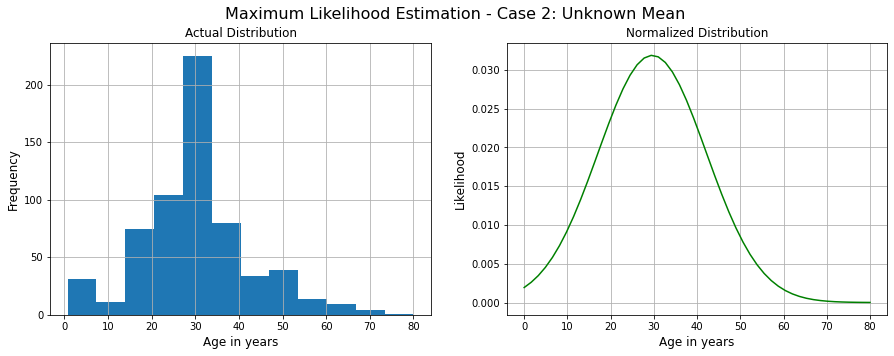

In [7]:
from math import pow, sqrt

# Case 2: Maximum Likelihood Estimation with Unknown Mean
mu = None
sigma = 12.511818

# Calculate Unknown Sigma
def calc_mu(df):
    sum = 0
    for x in df:
        sum += int(x)
    return (1/len(df) * sum)

x = np.linspace(0, 80)
y = norm.pdf(x, loc = calc_mu(df['age']), scale = sigma)

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Maximum Likelihood Estimation - Case 2: Unknown Mean', fontsize=16)
ax = plt.subplot(1, 2, 1)
plt.title('Actual Distribution')
plt.hist(df['age'], bins=12)
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.grid(True)

ax = plt.subplot(1, 2, 2)
plt.title('Normalized Distribution')
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Likelihood', fontsize=12)
plt.plot(x, y, 'g')
plt.grid(True)

print("Mean (Mu) = ", calc_mu(df.age))
print("Standard Deviation (Sigma) = ", sigma)

Mean (Mu) =  29.631308
Standard Deviation (Sigma) =  12.505947274885644


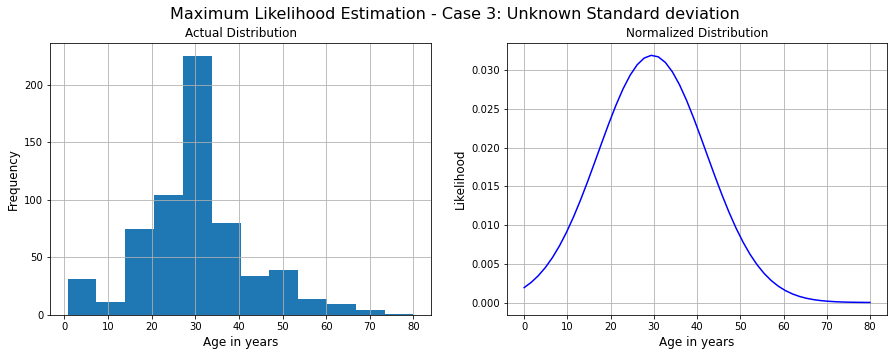

In [8]:
from math import pow, sqrt

# Case 3: Maximum Likelihood Estimation with Unknown Standard deviation 
mu = 29.631308
sigma = None

# Calculate Unknown Sigma
def calc_sigma(df):
    sum = 0
    for x in df:
        sum += pow(int(x) - mu, 2)
    return sqrt(1/len(df) * sum)

x = np.linspace(0, 80)
y = norm.pdf(x, loc = mu, scale = calc_sigma(df['age']))

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Maximum Likelihood Estimation - Case 3: Unknown Standard deviation', fontsize=16)

ax = plt.subplot(1, 2, 1)
plt.title('Actual Distribution')
plt.hist(df['age'], bins=12)
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.grid(True)

ax = plt.subplot(1, 2, 2)
plt.title('Normalized Distribution')
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Likelihood', fontsize=12)
plt.plot(x, y, 'b')
plt.grid(True)

print("Mean (Mu) = ", mu)
print("Standard Deviation (Sigma) = ", calc_sigma(df.age))

Mean (Mu) =  29.631308
Standard Deviation (Sigma) =  12.511818


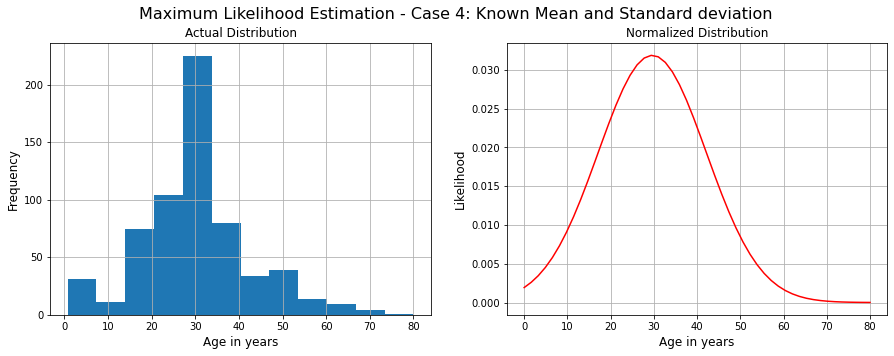

In [9]:
# Case 4: Maximum Likelihood Estimation with Known Mean and Standard deviation
mu = 29.631308
sigma = 12.511818

x = np.linspace(0, 80)
y = norm.pdf(x, loc = mu, scale = sigma)

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Maximum Likelihood Estimation - Case 4: Known Mean and Standard deviation', fontsize=16)

ax = plt.subplot(1, 2, 1)
plt.title('Actual Distribution')
plt.hist(df['age'], bins=12)
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.grid(True)

ax = plt.subplot(1, 2, 2)
plt.title('Normalized Distribution')
ax.set_xlabel('Age in years', fontsize=12)
ax.set_ylabel('Likelihood', fontsize=12)
plt.plot(x, y, 'r')
plt.grid(True)

print("Mean (Mu) = ", mu)
print("Standard Deviation (Sigma) = ", sigma)